<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/AlexNet_%2B_without_canny_(split701515).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing the necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [4]:
import os
import shutil
import random

train_dir = os.path.join(train_dataset, "")
val_dir = os.path.join(valid_dataset, "")
test_dir = os.path.join(test_dataset, "")
categories = ["normal", "cancer"]
target_val_size = 2643
target_test_size = 2643

## Validation dataset splitting
current_total_val = sum(len(os.listdir(os.path.join(val_dir, cat))) for cat in categories)
images_needed_val = max(0, target_val_size - current_total_val)

if images_needed_val == 0:
    print("Validation dataset is now splitted")
else:
    moved_count_val = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        val_path = os.path.join(val_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_val = min(images_needed_val // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_val):
            shutil.move(os.path.join(train_path, image), os.path.join(val_path, image))
            moved_count_val += 1
            print(f"Moved {images_to_move_val} images to '{val_path}'")
print("Validation image movement is now complete")

## Testing dataset splitting
current_total_test = sum(len(os.listdir(os.path.join(test_dir, cat))) for cat in categories)
images_needed_test = max(0, target_test_size - current_total_test)

if images_needed_test == 0:
    print("Testing dataset is now splitted")
else:
    moved_count_test = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        test_path = os.path.join(test_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_test = min(images_needed_test // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_test):
            shutil.move(os.path.join(train_path, image), os.path.join(test_path, image))
            moved_count_test += 1
            print(f"Moved {images_to_move_test} images to '{test_path}'")
print("Testing image movement is now complete")

Validation dataset is now splitted
Validation image movement is now complete
Testing dataset is now splitted
Testing image movement is now complete


In [5]:
## function to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')



In [6]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['normal', 'cancer']


In [7]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [8]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 17617 images belonging to 2 classes.
found 2643 images belonging to 2 classes.
found 2643 images belonging to 2 classes.


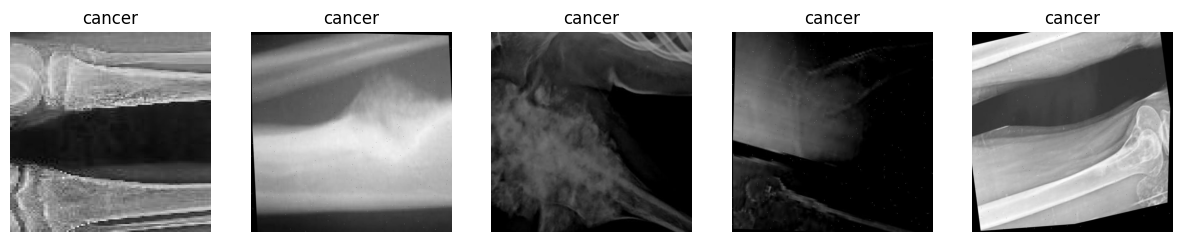

In [9]:


# Get classes (subfolders) in Train dataset
classes = [i for i in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, i))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(train_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1,5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()


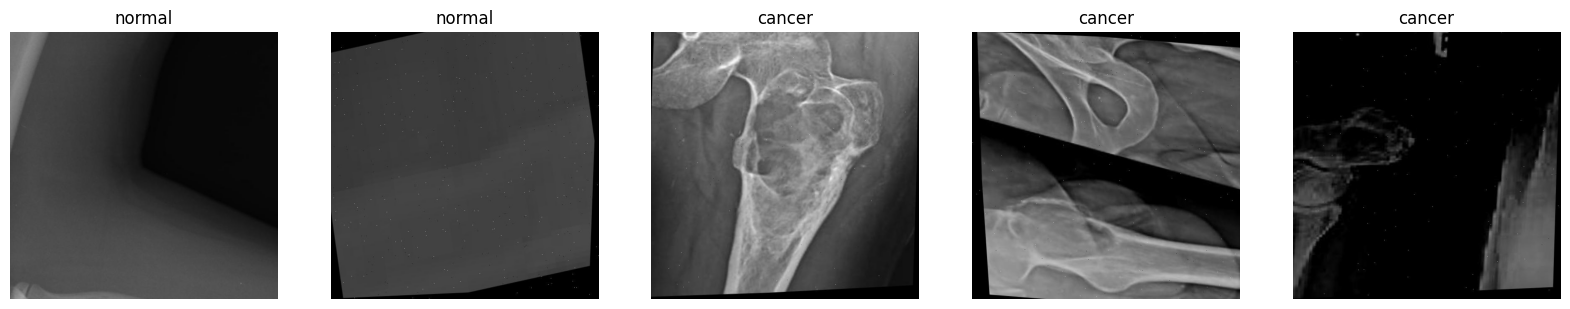

In [10]:


# Get classes (subfolders) in test dataset
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(test_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


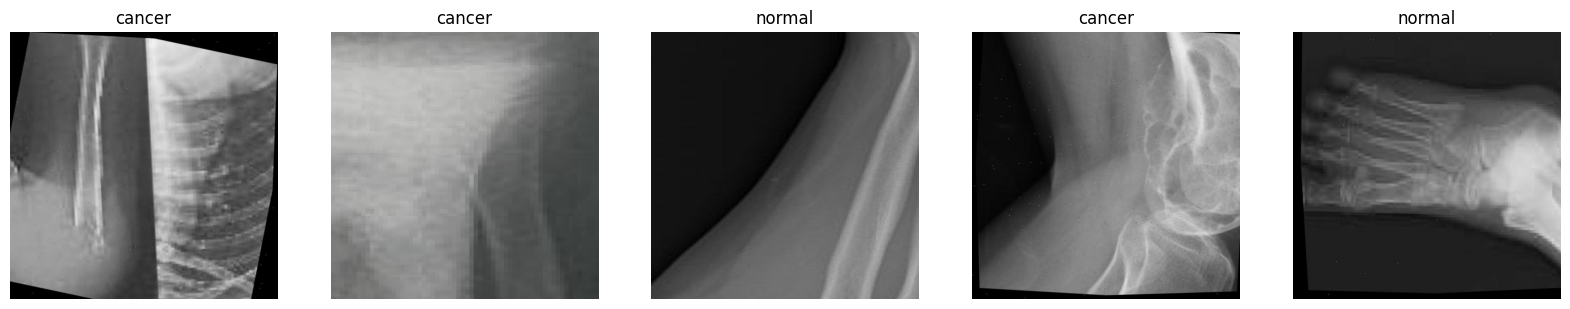

In [11]:


# Get classes (subfolders) in valid dataset
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(valid_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


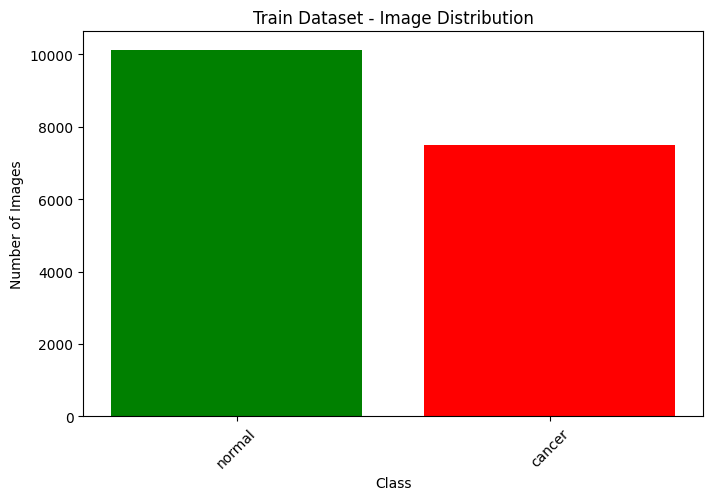

In [12]:
# Count images in each class (train)
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



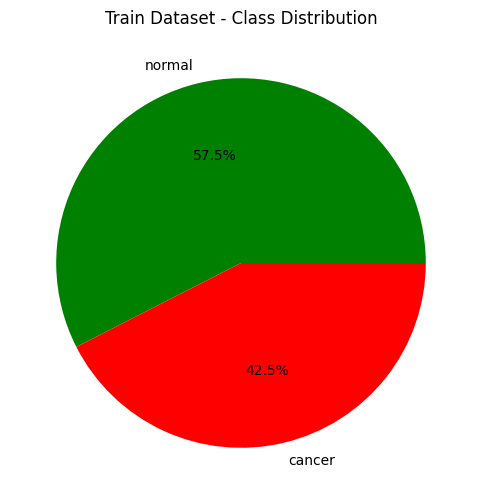

In [13]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

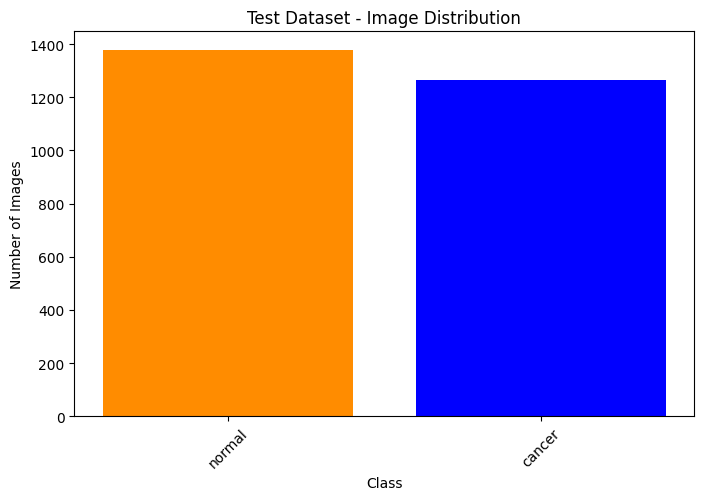

In [14]:
# Count images in each class (test)
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



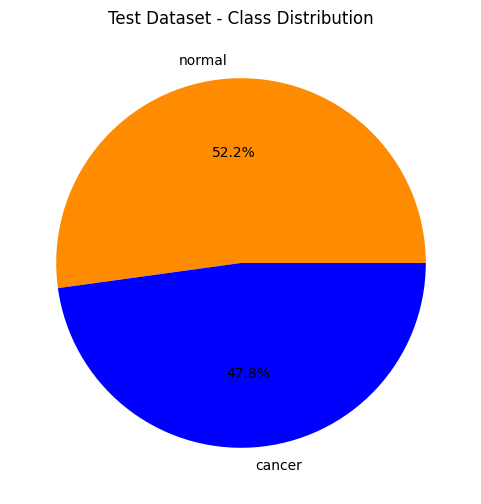

In [15]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

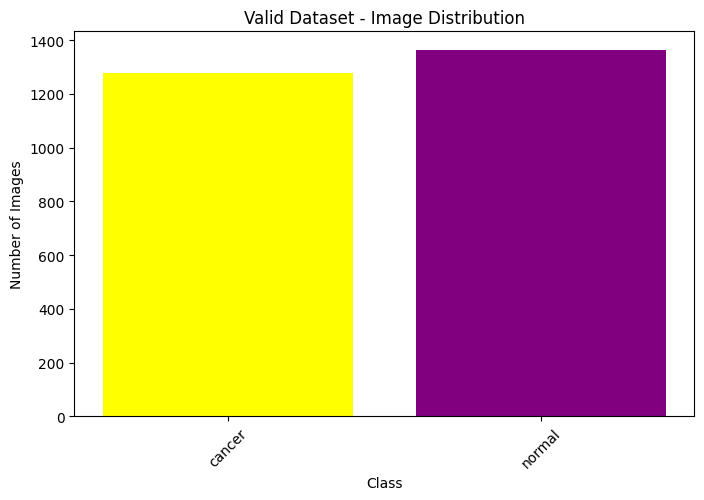

In [16]:
# Count images in each class (validation)
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



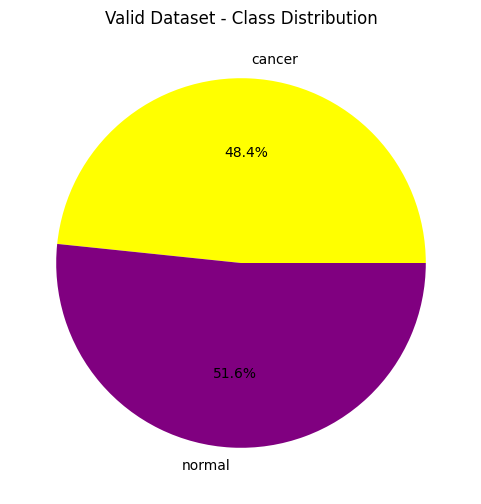

In [17]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()

In [18]:
import pandas as pd

In [19]:
datagen = ImageDataGenerator(
    rescale=1./255,
)

In [20]:
def create_dataframe(dataset_path):
    data = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                data.append([os.path.join(class_name, image_file), class_name])  # [image, label]
    return pd.DataFrame(data, columns=['image', 'label'])

train_df = create_dataframe(train_dataset)
test_df = create_dataframe(test_dataset)
valid_df = create_dataframe(valid_dataset)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch sizes
image_size = (227, 227)
batch_size = 32

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation and test data
test_val_datagen = ImageDataGenerator(rescale=1./255)

#  Training generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=train_dataset
)

#  Validation generator
valid_generator = test_val_datagen.flow_from_dataframe(
    valid_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=valid_dataset
)

#  Test generator
test_generator = test_val_datagen.flow_from_dataframe(
    test_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=test_dataset
)


Found 17617 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.


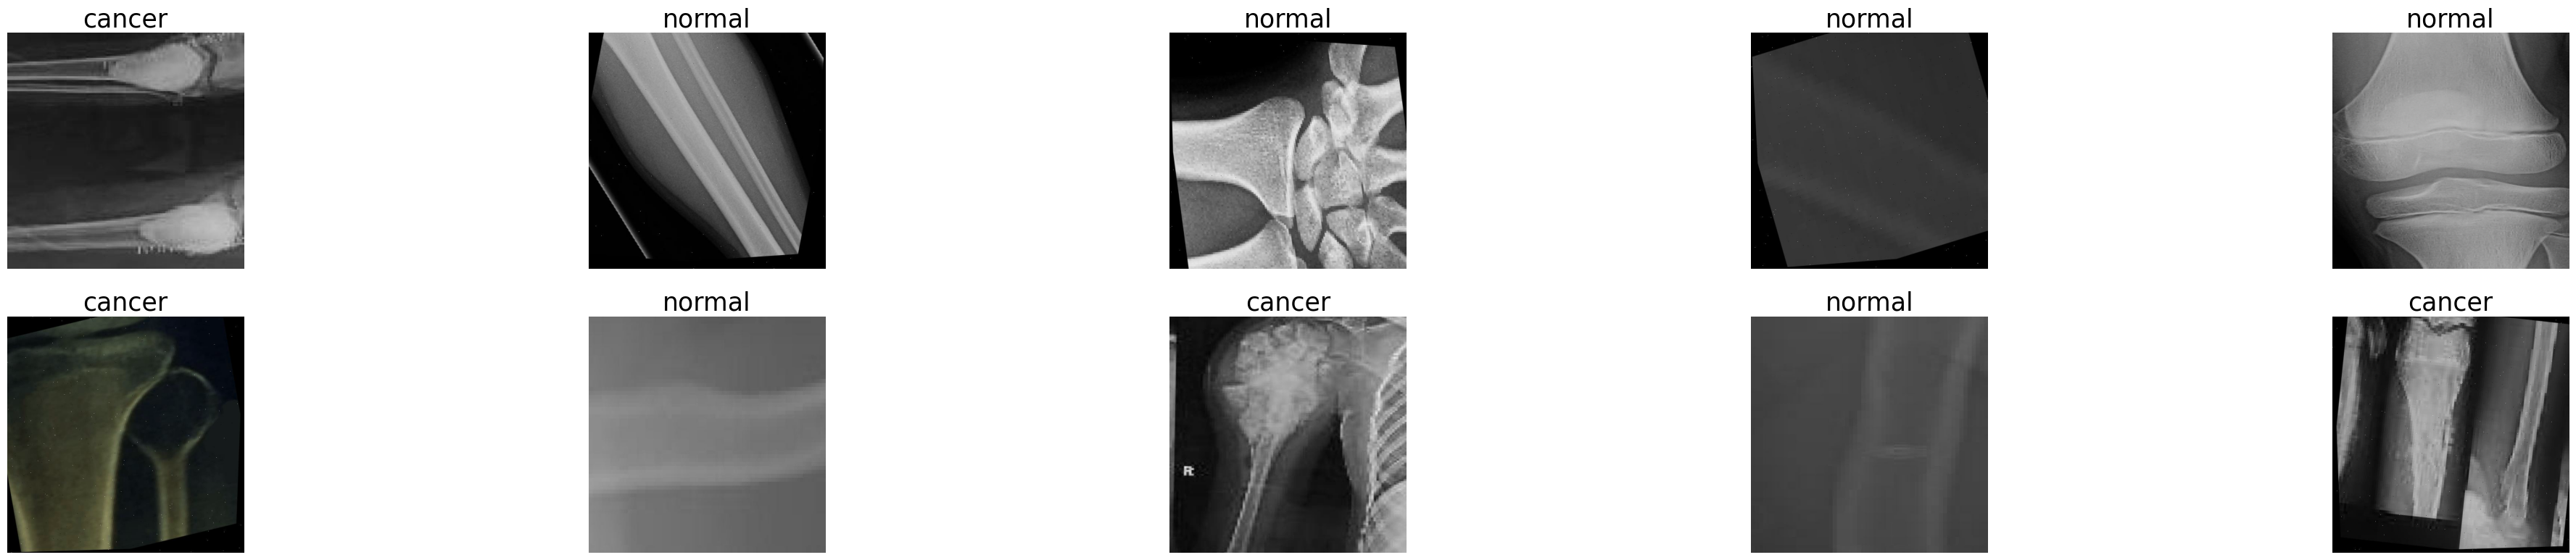

In [22]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train_df),10)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train_dataset + '/' + train_df.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train_df.label[i],fontsize=25)

In [23]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

# Binary classification - final output = 1 with sigmoid activation
class_num = 1

model = models.Sequential()

# Layer 1: Conv  ReLU  MaxPool
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4),
                        activation='relu', input_shape=(227, 227, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2: Conv  ReLU MaxPool
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same',
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3: Conv  ReLU
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                        activation='relu'))

# Layer 4: Conv ReLU
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                        activation='relu'))

# Layer 5: Conv ReLU  MaxPool
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten before fully connected layers
model.add(layers.Flatten())

# FC1: Dense + Dropout
model.add(layers.Dense(4096, activation='relu',
                       kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))

# FC2: Dense + Dropout
model.add(layers.Dense(4096, activation='relu',
                       kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))

# Output Layer (1 neuron, sigmoid for binary classification)
model.add(layers.Dense(class_num, activation='sigmoid'))

# Compile
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,286,849 (222.35 MB)

 Trainable params: 58,286,145 (222.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [24]:
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics
import  tensorflow.keras as keras


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

# Define callbacks
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

# Compile model with additional metrics
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.AUC()
    ]
)

# Train model with callbacks for early stopping and saving the best model
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=[checkpoint_cb, early_stopping_cb]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6752 - auc: 0.7267 - loss: 3.7419 - specificity_at_sensitivity: 0.8327

551/551 ━━━━━━━━━━━━━━━━━━━━ 5829s 11s/step - accuracy: 0.6752 - auc: 0.7268 - loss: 3.7389 - specificity_at_sensitivity: 0.8328 - val_accuracy: 0.6326 - val_auc: 0.8071 - val_loss: 1.4597 - val_specificity_at_sensitivity: 0.8928
Epoch 2/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.7368 - auc: 0.7953 - loss: 0.9864 - specificity_at_sensitivity: 0.9179

551/551 ━━━━━━━━━━━━━━━━━━━━ 339s 584ms/step - accuracy: 0.7368 - auc: 0.7953 - loss: 0.9862 - specificity_at_sensitivity: 0.9180 - val_accuracy: 0.7196 - val_auc: 0.8428 - val_loss: 0.8049 - val_specificity_at_sensitivity: 0.9624
Epoch 3/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.7566 - auc: 0.8306 - loss: 0.7069 - specificity_at_sensitivity: 0.9420

551/551 ━━━━━━━━━━━━━━━━━━━━ 328s 595ms/step - accuracy: 0.7566 - auc: 0.8306 - loss: 0.7068 - specificity_at_sensitivity: 0.9420 - val_accuracy: 0.7681 - val_auc: 0.8625 - val_loss: 0.6546 - val_specificity_at_sensitivity: 0.9617
Epoch 4/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.7719 - auc: 0.8469 - loss: 0.5981 - specificity_at_sensitivity: 0.9488

551/551 ━━━━━━━━━━━━━━━━━━━━ 320s 581ms/step - accuracy: 0.7719 - auc: 0.8469 - loss: 0.5980 - specificity_at_sensitivity: 0.9488 - val_accuracy: 0.8093 - val_auc: 0.8841 - val_loss: 0.5100 - val_specificity_at_sensitivity: 0.9742
Epoch 5/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.7724 - auc: 0.8507 - loss: 0.5366 - specificity_at_sensitivity: 0.9433

551/551 ━━━━━━━━━━━━━━━━━━━━ 318s 578ms/step - accuracy: 0.7724 - auc: 0.8507 - loss: 0.5367 - specificity_at_sensitivity: 0.9433 - val_accuracy: 0.8059 - val_auc: 0.8757 - val_loss: 0.5008 - val_specificity_at_sensitivity: 0.9710
Epoch 6/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 315s 571ms/step - accuracy: 0.7715 - auc: 0.8540 - loss: 0.5299 - specificity_at_sensitivity: 0.9553 - val_accuracy: 0.5933 - val_auc: 0.8614 - val_loss: 0.9919 - val_specificity_at_sensitivity: 0.9562
Epoch 7/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.7732 - auc: 0.8507 - loss: 0.5354 - specificity_at_sensitivity: 0.9528

551/551 ━━━━━━━━━━━━━━━━━━━━ 317s 576ms/step - accuracy: 0.7732 - auc: 0.8508 - loss: 0.5354 - specificity_at_sensitivity: 0.9528 - val_accuracy: 0.7953 - val_auc: 0.8722 - val_loss: 0.4867 - val_specificity_at_sensitivity: 0.9812
Epoch 8/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 311s 564ms/step - accuracy: 0.7843 - auc: 0.8594 - loss: 0.5076 - specificity_at_sensitivity: 0.9458 - val_accuracy: 0.7847 - val_auc: 0.8770 - val_loss: 0.5133 - val_specificity_at_sensitivity: 0.9804
Epoch 9/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.7744 - auc: 0.8492 - loss: 0.5308 - specificity_at_sensitivity: 0.9472

551/551 ━━━━━━━━━━━━━━━━━━━━ 360s 653ms/step - accuracy: 0.7744 - auc: 0.8492 - loss: 0.5308 - specificity_at_sensitivity: 0.9472 - val_accuracy: 0.8207 - val_auc: 0.9017 - val_loss: 0.4679 - val_specificity_at_sensitivity: 0.9797
Epoch 10/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 304s 552ms/step - accuracy: 0.7901 - auc: 0.8756 - loss: 0.4857 - specificity_at_sensitivity: 0.9554 - val_accuracy: 0.7930 - val_auc: 0.9042 - val_loss: 0.4777 - val_specificity_at_sensitivity: 0.9726


In [26]:
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,auc,loss,specificity_at_sensitivity,val_accuracy,val_auc,val_loss,val_specificity_at_sensitivity
0,0.709712,0.776099,2.078371,0.901028,0.632614,0.807124,1.459698,0.892801
1,0.737867,0.801394,0.895362,0.930813,0.719637,0.842820,0.804891,0.962441
2,0.761310,0.834953,0.680770,0.943636,0.768067,0.862457,0.654563,0.961659
3,0.773287,0.849488,0.576800,0.947509,0.809308,0.884124,0.510026,0.974178
4,0.766589,0.841730,0.553040,0.940297,0.805902,0.875706,0.500848,0.971049
5,0.773912,0.856457,0.528805,0.952317,0.593265,0.861435,0.991926,0.956182
6,0.776863,0.856946,0.518652,0.950982,0.795308,0.872166,0.486662,0.981221
7,0.784299,0.862775,0.505966,0.948978,0.784714,0.876962,0.513298,0.980438
8,0.781631,0.859149,0.515081,0.949913,0.820658,0.901669,0.467872,0.979656
9,0.791565,0.874583,0.492190,0.956324,0.793038,0.904250,0.477651,0.972613


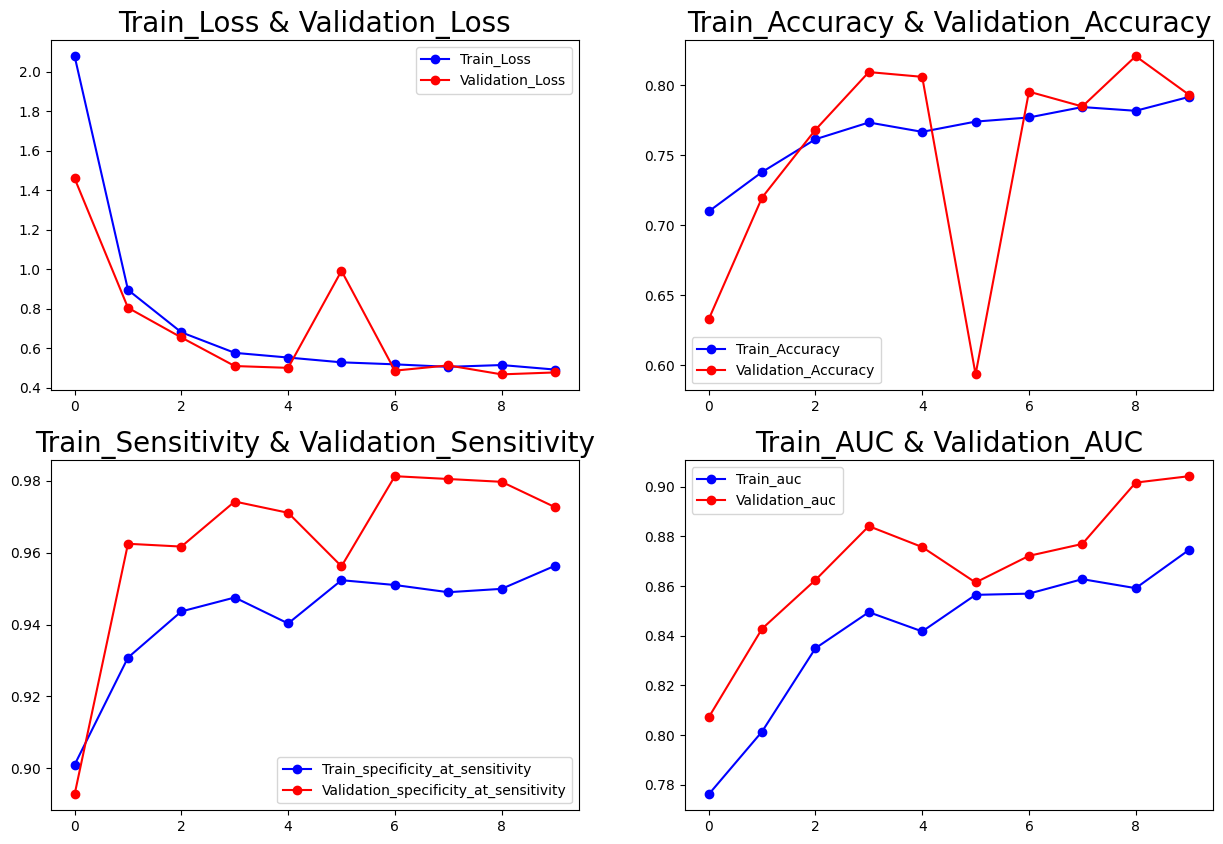

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [28]:

# Get all the metrics (loss, accuracy, specificity_at_sensitivity, auc)
metrics = model.evaluate(test_generator, verbose=0)

# Assign values to variables
loss = metrics[0]
accuracy = metrics[1]
specificity_at_sensitivity = metrics[2]
auc = metrics[3]

# Print the metrics
print('Test Loss =', loss)
print('Test Accuracy =', accuracy)
print('Test Specificity at Sensitivity =', specificity_at_sensitivity)
print('Test AUC =', auc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss = 0.4655194580554962
Test Accuracy = 0.825955331325531
Test Specificity at Sensitivity = 0.9754746556282043
Test AUC = 0.9054990410804749


In [29]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step


,Actual,Prediction
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2638,0,0
2639,0,0
2640,0,1
2641,0,1


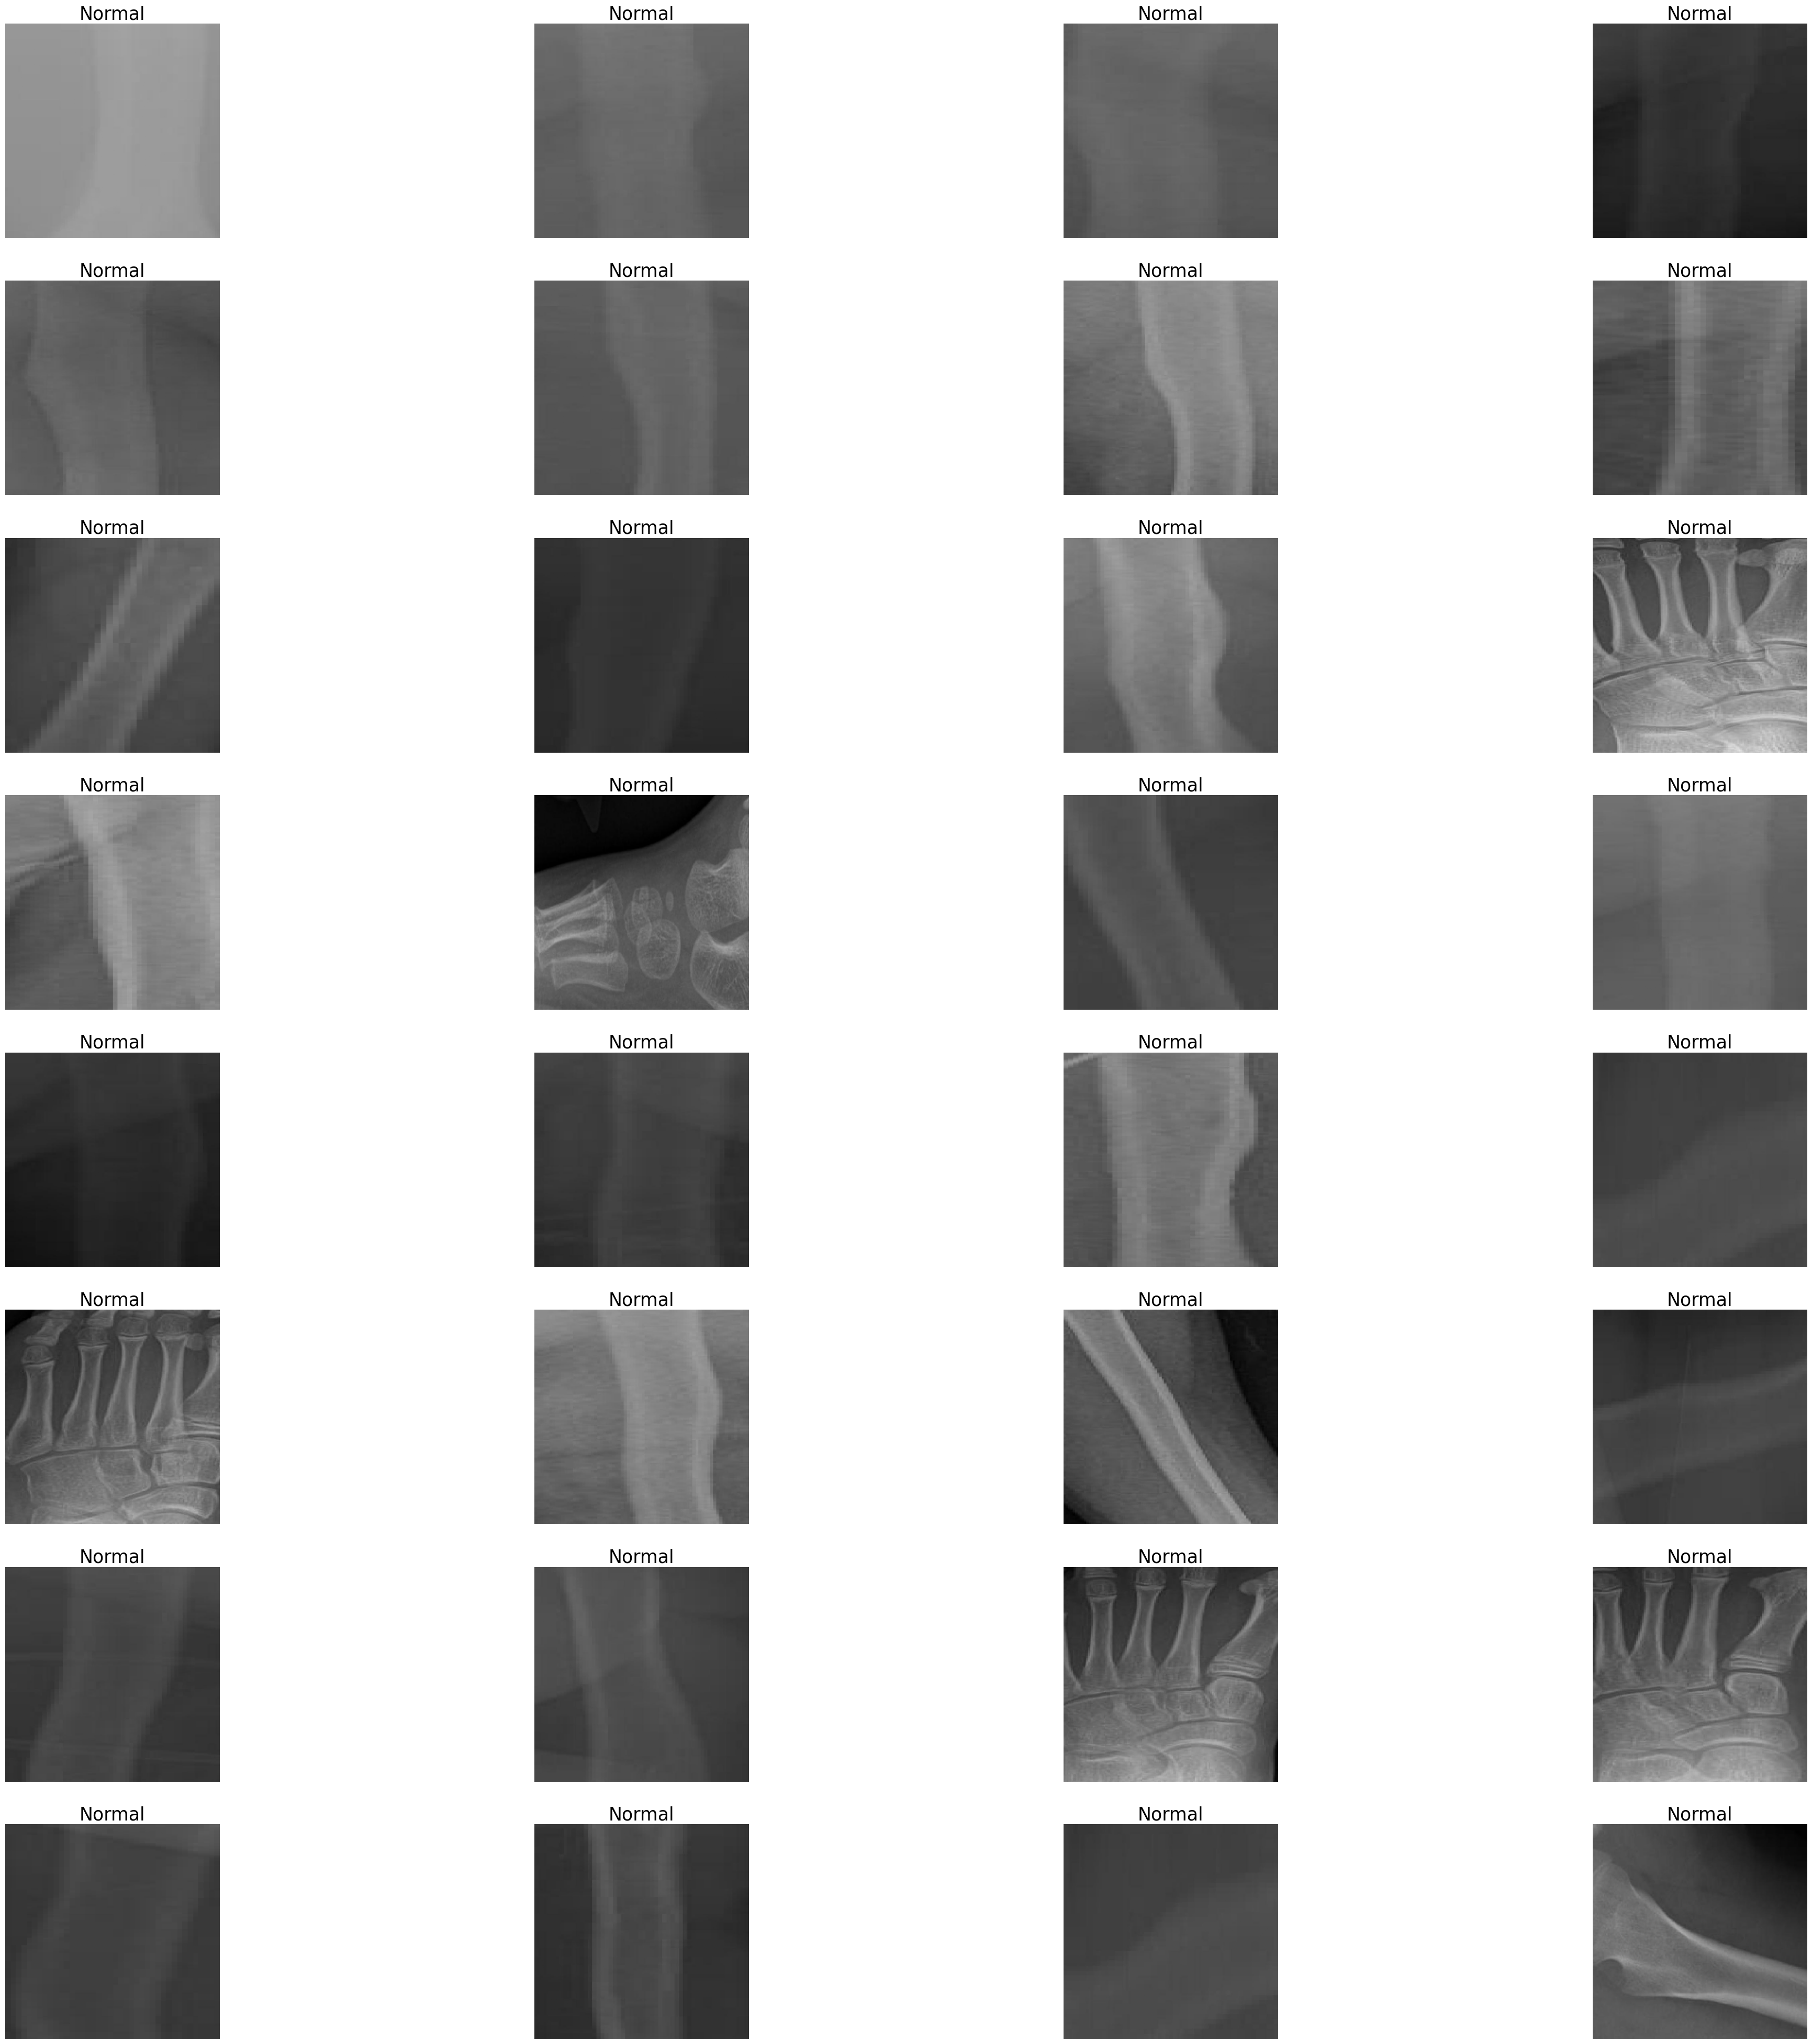

In [30]:
class_names=['Cancer', 'Normal']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

In [31]:
# Import the necessary library and function
from sklearn.metrics import classification_report


In [32]:
# Classification Report
ClassificationReport = classification_report(y_test, y_pred, target_names=['Cancer','Normal'])
print('Classification Report:\n', ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

      Cancer       0.79      0.86      0.83      1264
      Normal       0.86      0.79      0.83      1379

    accuracy                           0.83      2643
   macro avg       0.83      0.83      0.83      2643
weighted avg       0.83      0.83      0.83      2643



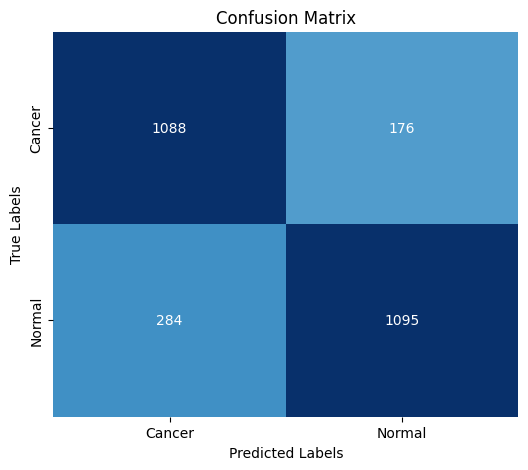

Confusion Matrix:
 [[1088  176]
 [ 284 1095]]


In [33]:
from sklearn.metrics import confusion_matrix # import the confusion_matrix function
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Blues',
            xticklabels=['Cancer', 'Normal'],
            yticklabels=['Cancer', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Confusion Matrix:\n', CM)

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [35]:
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

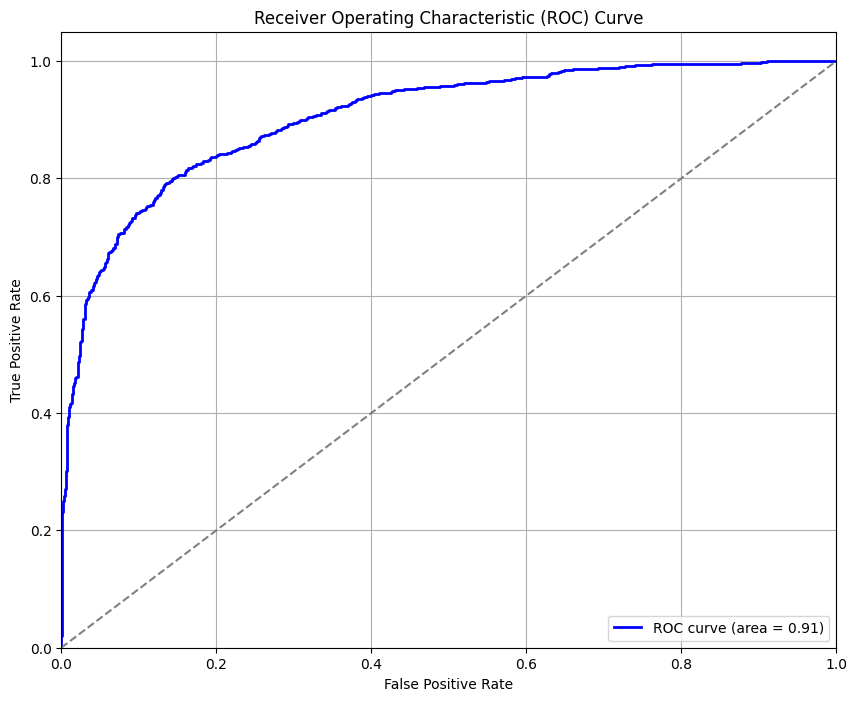

ROC AUC Score: 0.91


In [36]:
# Import the necessary library and function
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels (if not already)
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()

#Calculate fpr, tpr, and roc_auc
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(f'ROC AUC Score: {roc_auc:.2f}')

## USER INPUT

In [37]:
import ipywidgets as widgets
from IPython.display import display

def predict_and_display(user_input):
    """Predicts and displays an image based on user input."""

    if user_input not in ["cancer", "normal"]:
        print("Invalid input. Please enter 'cancer' or 'normal'.")
        return

    # Filter test_df based on user input
    filtered_df = test_df[test_df['label'] == user_input]

    if filtered_df.empty:
        print(f"No images found for class '{user_input}' in the test dataset.")
        return

    # Select a random image from the filtered DataFrame
    random_image_row = filtered_df.sample(n=1)
    image_path = os.path.join(test_dataset, random_image_row['image'].values[0])

    # Load and display the image
    img = mpimg.imread(image_path)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title(f"Predicted Class: {user_input}")
    plt.axis("off")
    plt.show()


# Create an input widget
input_widget = widgets.Text(
    value='',
    placeholder='Enter "cancer" or "normal"',
    description='Class:',
    disabled=False
)

widgets.interactive(predict_and_display, user_input=input_widget)


interactive(children=(Text(value='', description='Class:', placeholder='Enter "cancer" or "normal"'), Output()…